## Problem 1:

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

### **Data Dictionary**

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

8. political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.

9. gender: female or male.


## Importing basic libraries and load the data

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [168]:
df = pd.read_excel('Election_Data.xlsx', 'Election_Dataset_Two Classes')

In [169]:
df.shape

(1525, 10)

In [170]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [171]:
df.columns

Index(['Unnamed: 0', 'vote', 'age', 'economic.cond.national',
       'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge', 'gender'],
      dtype='object')

In [172]:
df = df.drop('Unnamed: 0', axis=1)

### EDA

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


 1. Given dataset has 1525 entries with 10 different variables  from which 2 are object datatypes while others are numeric datatype but categorical in nature except age column.
 2. There is no null values present in the dataset.
 3. Unnamed:0 columns is nothing but the index itself there is no any significance in the analysis.

In [174]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


Numerical varibales five point summary shows
1. Age ranges from minimum 24 to maximum 93 with standard deviation of 15
2. Economic condition assessed by voters interms of national and household in the scale of 1 to 5 has mean value of 3 means moderate and normally distributed
3. comparing mean assessed value of Blair and Hauge the voters inclined towards the Blair slightly 0.75 points results Labour votes are more in the dataset.
4. Voters attitude towards the Europeon Integration is normally distributed

In [175]:
df.describe(include='object').T

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


1. Vote is the target variable in dataset has labour parties vote  on top with frequncy of 1063
2. Out of 1525 voters female voters are maximum in numbers i.e.812


<AxesSubplot:xlabel='vote', ylabel='count'>

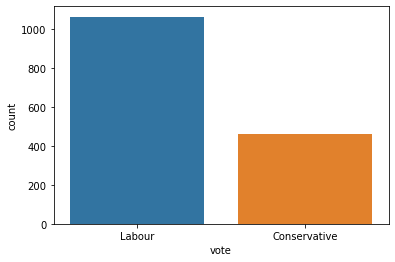

In [176]:
sns.countplot(df['vote'])

** as per discrtiptive analysis above countplot also shows the popularity of labour party

<AxesSubplot:xlabel='gender', ylabel='count'>

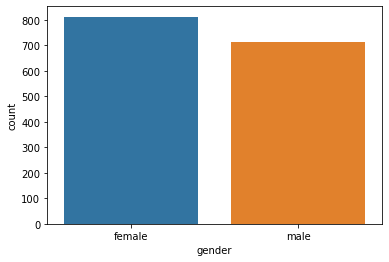

In [177]:
sns.countplot(df['gender'])

1. female vote share is comparatively greater than that of male .

In [178]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [179]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [180]:
df=df.drop_duplicates().sort_index()

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


### Univariate

Labour          0.69677
Conservative    0.30323
Name: vote, dtype: float64


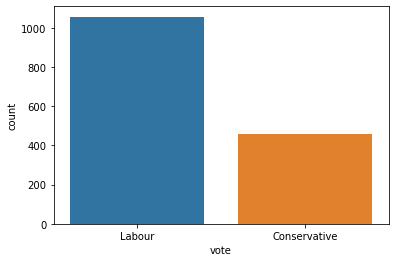



The mean of age  =  54.2412656558998
The median of age  =  53.0


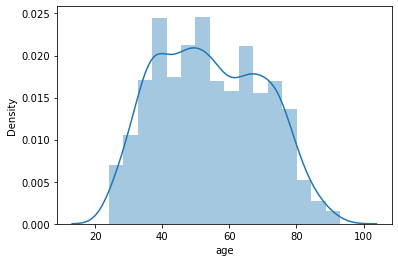

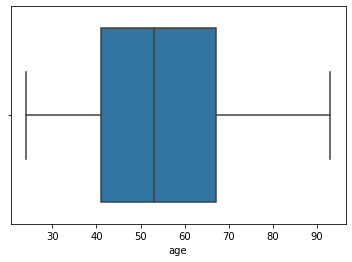



The mean of economic.cond.national  =  3.245220830586684
The median of economic.cond.national  =  3.0


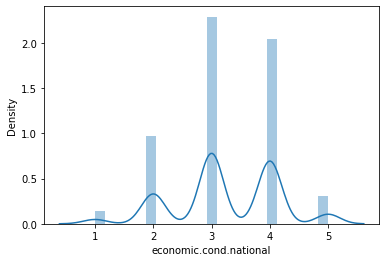

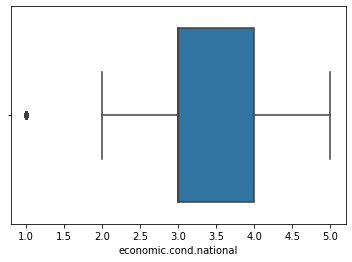



The mean of economic.cond.household  =  3.1377719182597232
The median of economic.cond.household  =  3.0


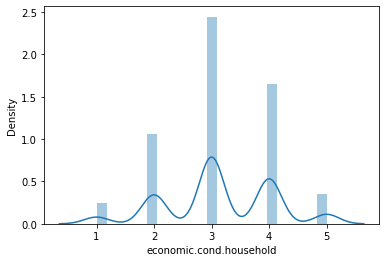

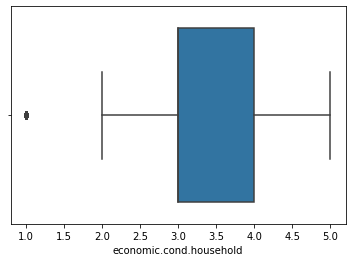



The mean of Blair  =  3.3355306526038233
The median of Blair  =  4.0


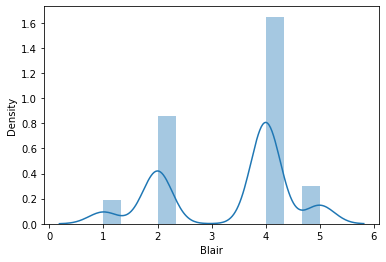

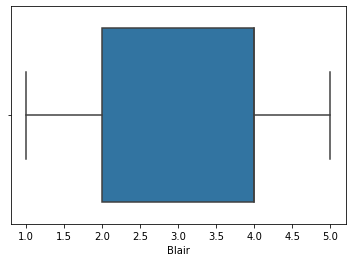



The mean of Hague  =  2.7495056031641396
The median of Hague  =  2.0


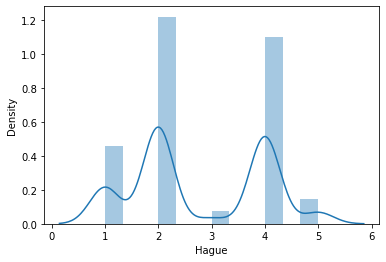

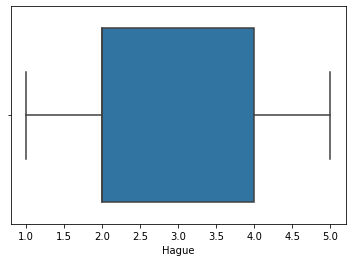



The mean of Europe  =  6.7402768622280815
The median of Europe  =  6.0


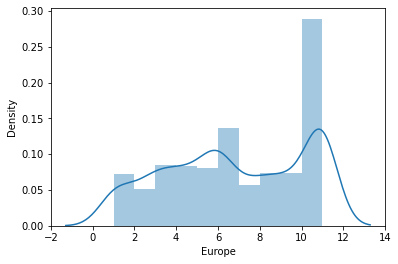

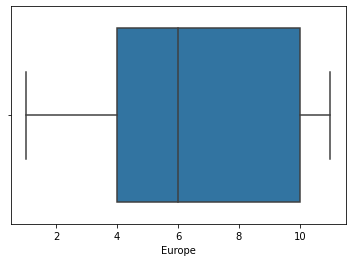



The mean of political.knowledge  =  1.5405405405405406
The median of political.knowledge  =  2.0


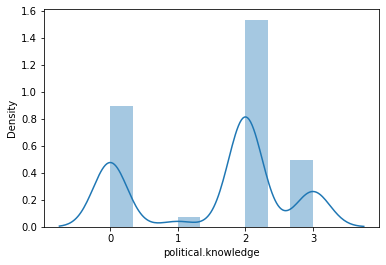

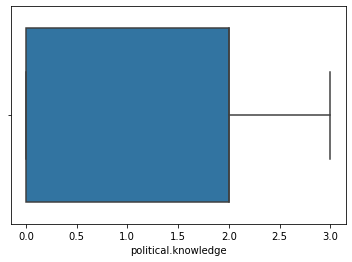



female    0.53263
male      0.46737
Name: gender, dtype: float64


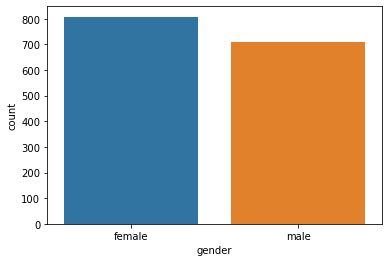

In [182]:
for column in df.columns:
    if df[column].dtypes!='object':
        print('The mean of','\033[94m' +  df[column].name +'\033[0m',' = ', df[column].mean())
        print('The median of','\033[93m' +  df[column].name +'\033[0m',' = ', df[column].median())
        sns.distplot(df[column])
        plt.show()
        sns.boxplot(df[column])
        plt.show()
        print('\n')
    else:
        print(df[column].value_counts(normalize=True))
        sns.countplot(df[column])
        plt.show()
        print('\n')
        

        

In [183]:
for column in df.columns:
    if df[column].dtypes!='object':
        
        print('\033[1m'+ 'Skewness' + '\033[0m', 'of the :', '\033[96m' +  df[column].name +'\033[0m', '=', round(df[column].skew(), 2))
        
        print('\033[1m' + 'Standarad Deviation ' + '\033[0m', 'of the :', '\033[91m' +  df[column].name +'\033[0m', '=', round(df[column].std(), 2))
        
        print('\n')
  

Skewness of the : age = 0.14
Standarad Deviation  of the : age = 15.7


Skewness of the : economic.cond.national = -0.24
Standarad Deviation  of the : economic.cond.national = 0.88


Skewness of the : economic.cond.household = -0.14
Standarad Deviation  of the : economic.cond.household = 0.93


Skewness of the : Blair = -0.54
Standarad Deviation  of the : Blair = 1.17


Skewness of the : Hague = 0.15
Standarad Deviation  of the : Hague = 1.23


Skewness of the : Europe = -0.14
Standarad Deviation  of the : Europe = 3.3


Skewness of the : political.knowledge = -0.42
Standarad Deviation  of the : political.knowledge = 1.08




array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'economic.cond.national'}>,
        <AxesSubplot:title={'center':'economic.cond.household'}>],
       [<AxesSubplot:title={'center':'Blair'}>,
        <AxesSubplot:title={'center':'Hague'}>,
        <AxesSubplot:title={'center':'Europe'}>],
       [<AxesSubplot:title={'center':'political.knowledge'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

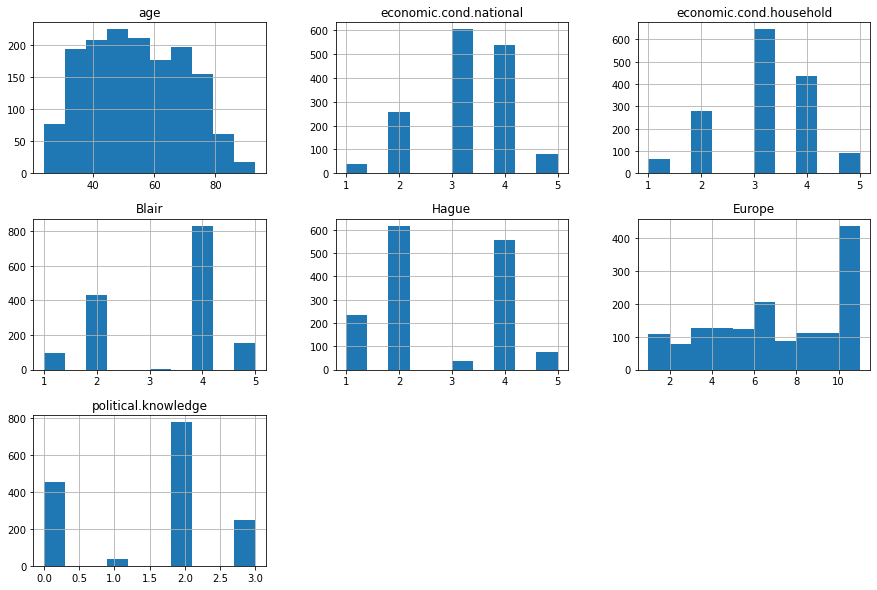

In [184]:
df.hist(df.columns, figsize=(15,10))        

In [185]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(), ':', df[column].nunique() )
        print(df[column].value_counts().sort_values() )
        print('\n')
    

VOTE : 2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER : 2
male      709
female    808
Name: gender, dtype: int64




<AxesSubplot:xlabel='gender', ylabel='economic.cond.national'>

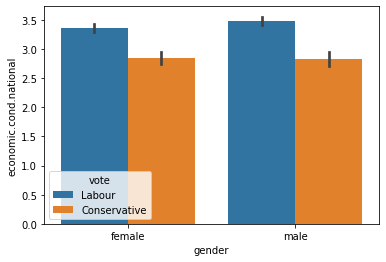

In [186]:
sns.barplot('gender','economic.cond.national', hue='vote', data=df)

<AxesSubplot:xlabel='gender', ylabel='economic.cond.household'>

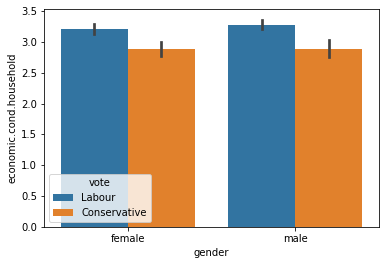

In [187]:
sns.barplot('gender','economic.cond.household', hue='vote', data=df)

<AxesSubplot:xlabel='vote', ylabel='Europe'>

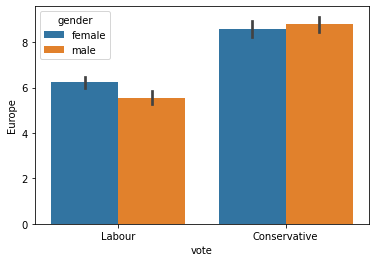

In [188]:
sns.barplot('vote','Europe', hue='gender', data=df)

<AxesSubplot:xlabel='gender', ylabel='Europe'>

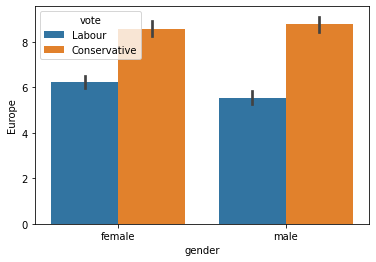

In [189]:
sns.barplot('gender','Europe', hue='vote', data=df)

<AxesSubplot:xlabel='vote', ylabel='Blair'>

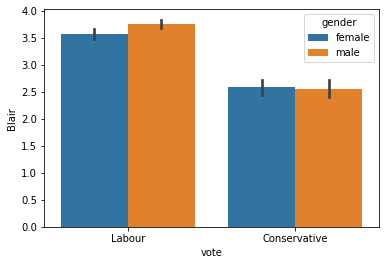

In [190]:
sns.barplot('vote','Blair', hue='gender', data=df)

<AxesSubplot:xlabel='vote', ylabel='Hague'>

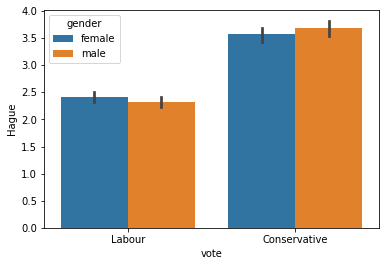

In [191]:
sns.barplot('vote','Hague', hue='gender', data=df)

<AxesSubplot:xlabel='economic.cond.household', ylabel='Hague'>

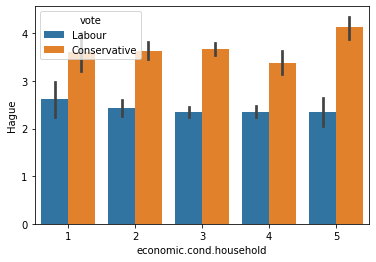

In [192]:
sns.barplot('economic.cond.household','Hague', hue='vote',  data=df)

<AxesSubplot:xlabel='economic.cond.household', ylabel='Hague'>

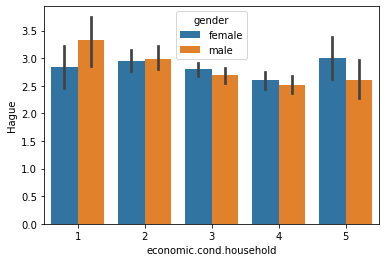

In [193]:
sns.barplot('economic.cond.household','Hague', hue='gender',  data=df)

<AxesSubplot:xlabel='economic.cond.household', ylabel='Blair'>

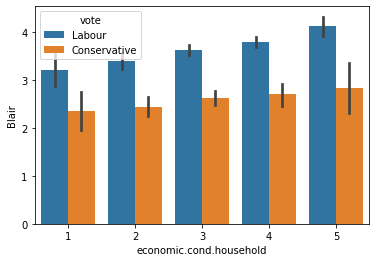

In [194]:
sns.barplot('economic.cond.household','Blair', hue='vote', data=df)

<AxesSubplot:xlabel='economic.cond.household', ylabel='Blair'>

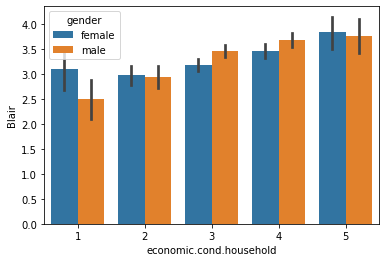

In [195]:
sns.barplot('economic.cond.household','Blair', hue='gender', data=df)

<AxesSubplot:xlabel='economic.cond.household', ylabel='age'>

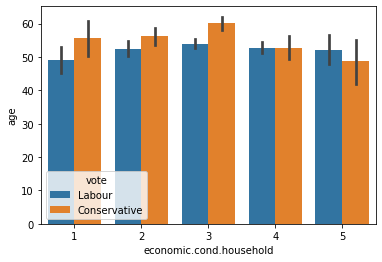

In [196]:
sns.barplot('economic.cond.household','age', hue='vote', data=df)

<AxesSubplot:xlabel='economic.cond.household', ylabel='age'>

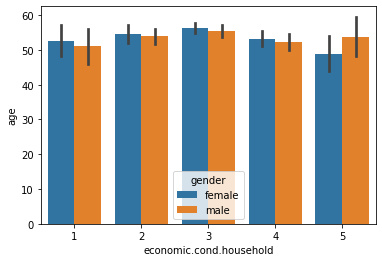

In [197]:
sns.barplot('economic.cond.household','age', hue='gender', data=df)

<AxesSubplot:xlabel='economic.cond.national', ylabel='age'>

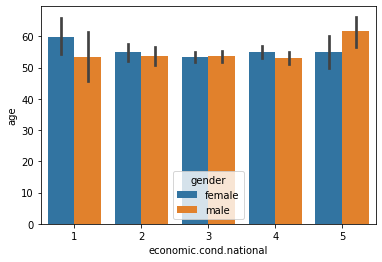

In [198]:
sns.barplot('economic.cond.national','age', hue='gender', data=df)

<AxesSubplot:xlabel='gender', ylabel='political.knowledge'>

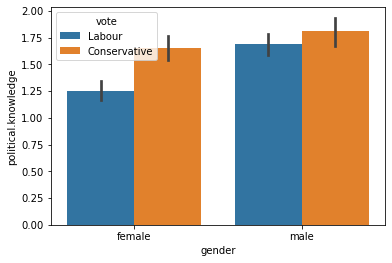

In [199]:
sns.barplot('gender','political.knowledge', hue='vote', data=df)

<AxesSubplot:xlabel='gender', ylabel='political.knowledge'>

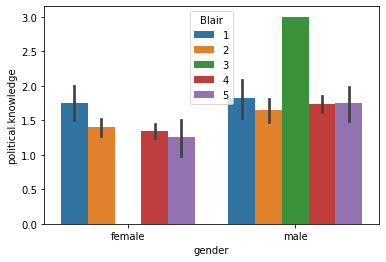

In [200]:
sns.barplot('gender','political.knowledge', hue='Blair', data=df)

<AxesSubplot:xlabel='gender', ylabel='political.knowledge'>

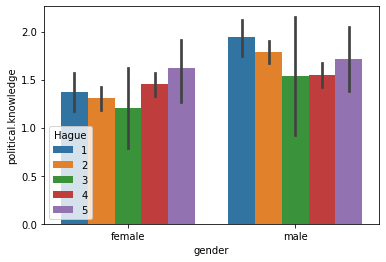

In [201]:
sns.barplot('gender','political.knowledge', hue='Hague', data=df)

<AxesSubplot:xlabel='gender', ylabel='political.knowledge'>

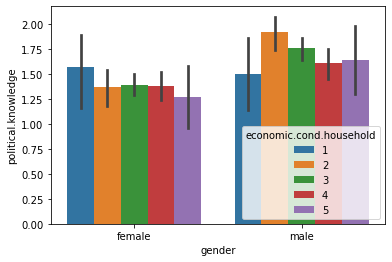

In [202]:
sns.barplot('gender','political.knowledge', hue='economic.cond.household', data=df)

<AxesSubplot:xlabel='vote', ylabel='age'>

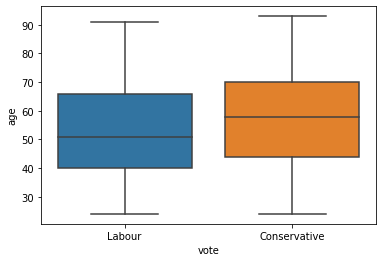

In [203]:
sns.boxplot(df["vote"],df['age'])

<AxesSubplot:xlabel='age', ylabel='Blair'>

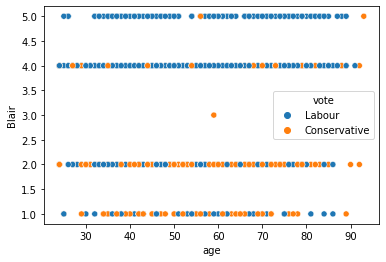

In [204]:
sns.scatterplot('age', 'Blair', hue= 'vote', data = df)

<AxesSubplot:xlabel='age', ylabel='Hague'>

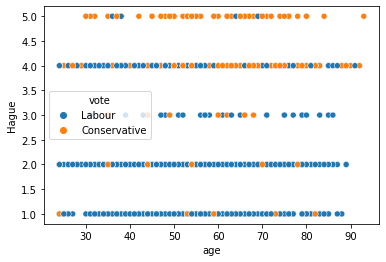

In [205]:
sns.scatterplot('age', 'Hague', hue= 'vote', data = df)

1. From above two scatter plot voters from all aged assessed blair highest 
2. Old age peoples assessed hague higher 

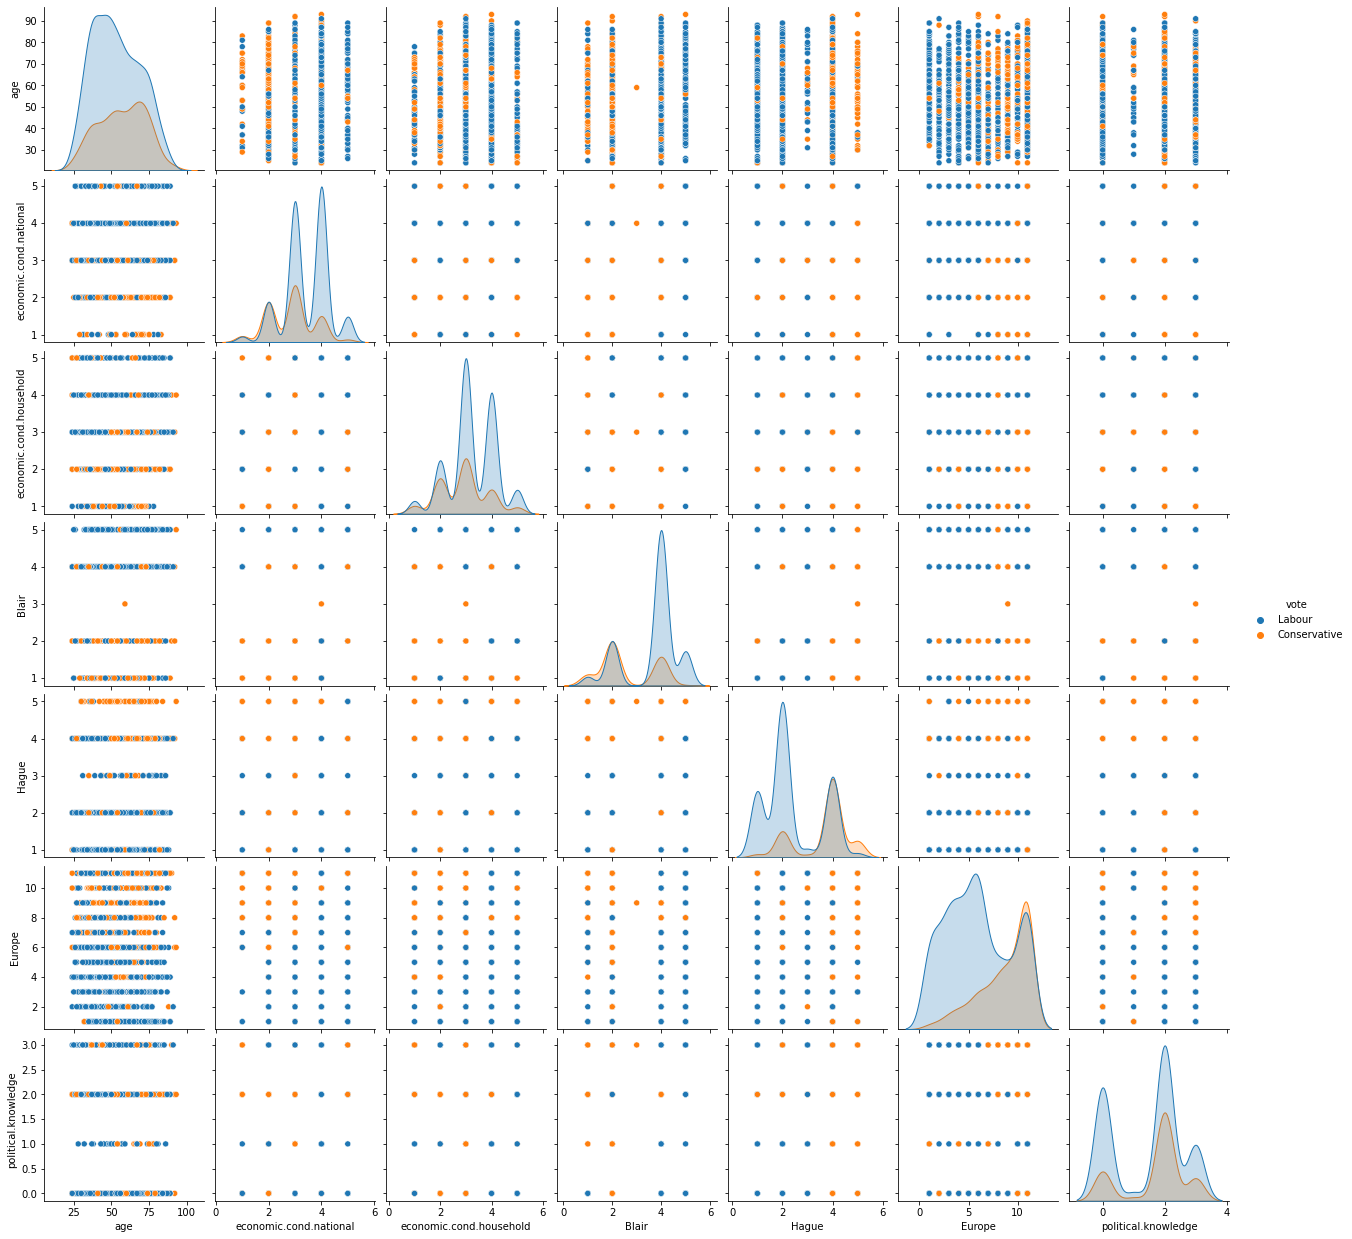

In [206]:
sns.pairplot(df, hue='vote')

In [207]:
corr = df.corr()

<AxesSubplot:>

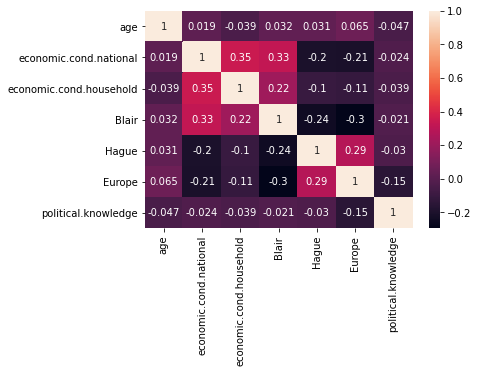

In [208]:
sns.heatmap(corr, annot=True)

### Encoding

In [209]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)
        
    

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [210]:
df = pd.get_dummies(df, columns=cat, drop_first=True)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      1517 non-null   int64
 1   economic.cond.national   1517 non-null   int64
 2   economic.cond.household  1517 non-null   int64
 3   Blair                    1517 non-null   int64
 4   Hague                    1517 non-null   int64
 5   Europe                   1517 non-null   int64
 6   political.knowledge      1517 non-null   int64
 7   vote_Labour              1517 non-null   uint8
 8   gender_male              1517 non-null   uint8
dtypes: int64(7), uint8(2)
memory usage: 137.8 KB


### Outliers Treatment

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'age'),
  Text(2, 0, 'economic.cond.national'),
  Text(3, 0, 'economic.cond.household'),
  Text(4, 0, 'Blair'),
  Text(5, 0, 'Hague'),
  Text(6, 0, 'Europe'),
  Text(7, 0, 'political.knowledge'),
  Text(8, 0, 'vote_Labour'),
  Text(9, 0, 'gender_male')])

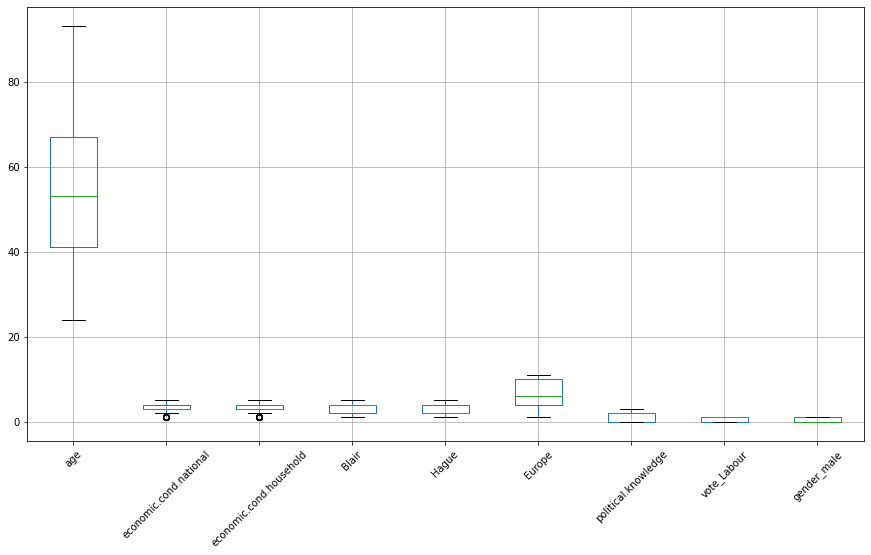

In [212]:
df.boxplot(figsize=(15,8))
plt.xticks(rotation = 45) 

In [213]:
df['economic.cond.national'] = np.where(df['economic.cond.national'] == 1, 2, df['economic.cond.national'])
df['economic.cond.household'] = np.where(df['economic.cond.household'] == 1, 2, df['economic.cond.household'])

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'age'),
  Text(2, 0, 'economic.cond.national'),
  Text(3, 0, 'economic.cond.household'),
  Text(4, 0, 'Blair'),
  Text(5, 0, 'Hague'),
  Text(6, 0, 'Europe'),
  Text(7, 0, 'political.knowledge'),
  Text(8, 0, 'vote_Labour'),
  Text(9, 0, 'gender_male')])

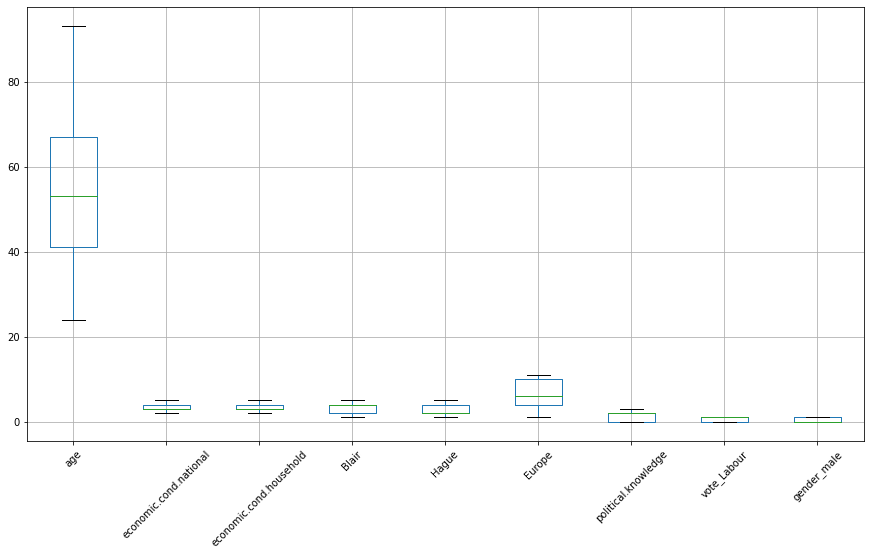

In [214]:
df.boxplot(figsize=(15,8))
plt.xticks(rotation = 45) 

### Seperation of Target and Predictors

In [215]:
x = df.drop(['vote_Labour'], axis=1 ) # predictors

In [216]:
y = df['vote_Labour'] # target variable

### Train Test Split

In [217]:
from sklearn.model_selection import train_test_split

In [218]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state=10)

In [219]:
print('Train set size:', x_train.shape)
print('Test set size:', x_test.shape)


Train set size: (1061, 8)
Test set size: (456, 8)


### Scaling

In [220]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [221]:
x_train_scaled = ss.fit_transform(x_train)

In [222]:
x_test_scaled = ss.transform(x_test)

### 1. Logistic Regression

In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [224]:
# Fit the model 
logr = LogisticRegression()
logr.fit(x_train, y_train)

logr_train_pred = logr.predict(x_train)
logr_train_score = logr.score(x_train,y_train)
print('\033[1m',  'Logistic Regression Train ' '\033[0m')
print('\033[96m',+ logr_train_score)
print('\n')
print(confusion_matrix(y_train, logr_train_pred))
print('\n')
print(classification_report(y_train, logr_train_pred))
print('\n')

 Logistic Regression Train 
 0.8444863336475024


[[218 103]
 [ 62 678]]


              precision    recall  f1-score   support

           0       0.78      0.68      0.73       321
           1       0.87      0.92      0.89       740

    accuracy                           0.84      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061





In [225]:
logr_test_pred = logr.predict(x_test)
logr_test_score = logr.score(x_test,y_test)
print('\033[1m',  'Logistic Regression Test ' '\033[0m')
print('\033[91m',+ logr_test_score)
print('\n')
print(confusion_matrix(y_test, logr_test_pred))
print('\n')
print(classification_report(y_test, logr_test_pred))
print('\n')

 Logistic Regression Test 
 0.8267543859649122


[[ 93  46]
 [ 33 284]]


              precision    recall  f1-score   support

           0       0.74      0.67      0.70       139
           1       0.86      0.90      0.88       317

    accuracy                           0.83       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.82      0.83      0.82       456





AUC for the Train (LogR): 0.89


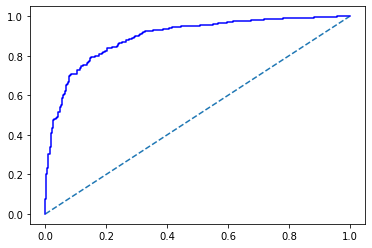

In [226]:
probs = logr.predict_proba(x_train)  # predict probabilities
probs = probs[:, 1]  # keep probabilities for the positive outcome only

logr_train_auc = roc_auc_score(y_train, probs)      # AUC
print('AUC for the Train (LogR): %.2f' %   logr_train_auc) 

logr_train_fpr, logr_train_tpr, logr_train_thresholds = roc_curve(y_train, probs) # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(logr_train_fpr, logr_train_tpr, color='Blue')   # plot the roc curve for the model

AUC for the Test (LogR): 0.88


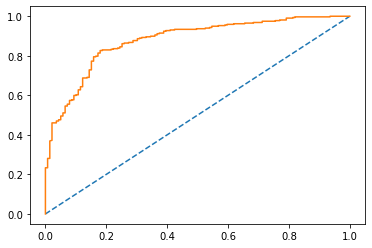

In [227]:
probs = logr.predict_proba(x_test)  # predict probabilities
probs = probs[:, 1]  # keep probabilities for the positive outcome only

logr_test_auc = roc_auc_score(y_test, probs)      # AUC
print('AUC for the Test (LogR): %.2f' %   logr_test_auc) 

logr_test_fpr, logr_test_tpr, logr_test_thresholds = roc_curve(y_test, probs) # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(logr_test_fpr, logr_test_tpr)   # plot the roc curve for the model

### 2. Linear Discriminant Analysis

In [228]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [229]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

lda_train_pred = lda.predict(x_train)
lda_train_score = lda.score(x_train, y_train)
print('\033[1m',  'LDA Train Set' '\033[0m')
print('\033[96m', + lda_train_score)
print('\n')
print(confusion_matrix(y_train, lda_train_pred))
print('\n')
print(classification_report(y_train, lda_train_pred))
print('\n')

 LDA Train Set
 0.8397737983034873


[[223  98]
 [ 72 668]]


              precision    recall  f1-score   support

           0       0.76      0.69      0.72       321
           1       0.87      0.90      0.89       740

    accuracy                           0.84      1061
   macro avg       0.81      0.80      0.81      1061
weighted avg       0.84      0.84      0.84      1061





In [230]:
lda_test_pred = lda.predict(x_test)
lda_test_score = lda.score(x_test, y_test)
print('\033[1m',  'LDA Test Set' '\033[0m')
print('\033[91m', + lda_test_score)
print('\n')
print(confusion_matrix(y_test, lda_test_pred))
print('\n')
print(classification_report(y_test, lda_test_pred))
print('\n')

 LDA Test Set
 0.8245614035087719


[[ 94  45]
 [ 35 282]]


              precision    recall  f1-score   support

           0       0.73      0.68      0.70       139
           1       0.86      0.89      0.88       317

    accuracy                           0.82       456
   macro avg       0.80      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456





AUC for the Train (LDA): 0.89


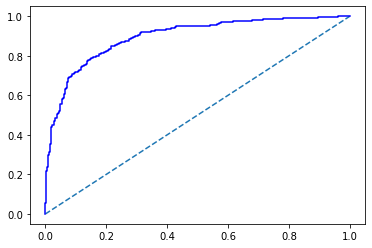

In [231]:
probs = lda.predict_proba(x_train)  # predict probabilities
probs = probs[:, 1]  # keep probabilities for the positive outcome only

lda_train_auc = roc_auc_score(y_train, probs)      # AUC
print('AUC for the Train (LDA): %.2f' %   lda_train_auc) 

lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs) # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(lda_train_fpr, lda_train_tpr, color='Blue')   # plot the roc curve for the model

AUC for the Test (LDA): 0.88


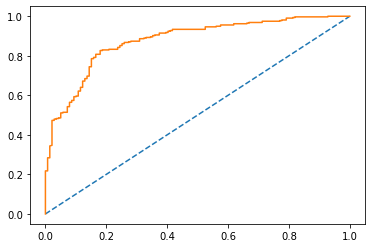

In [232]:
probs = lda.predict_proba(x_test)  # predict probabilities
probs = probs[:, 1]  # keep probabilities for the positive outcome only

lda_test_auc = roc_auc_score(y_test, probs)      # AUC
print('AUC for the Test (LDA): %.2f' %   lda_test_auc) 

lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs) # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(lda_test_fpr, lda_test_tpr)   # plot the roc curve for the model

### Logistics Regression and LDA Comparison


In [233]:
print('Accuracy on Train set Logistic Regression: %.2f' %  logr.score(x_train, y_train))
print('Accuracy on Test set Logistic Regression: %.2f' %  logr.score(x_test, y_test))

print('\n')

print('Accuracy on Train set LDA Model: %.2f' %  lda.score(x_train, y_train))
print('Accuracy on Test set LDA Model: %.2f' %  lda.score(x_test, y_test))

print('\n')

print('AUC Score on Train set - Logistic Regression :', np.round(logr_train_auc,2))
print('AUC Score on Test set - Logistic Regression : ', np.round(logr_test_auc,2))
print('\n')

print('AUC Score on Train set - LDA :',np.round(lda_train_auc,2))
print('AUC Score on Test set - LDA :', np.round(lda_test_auc,2))




Accuracy on Train set Logistic Regression: 0.84
Accuracy on Test set Logistic Regression: 0.83


Accuracy on Train set LDA Model: 0.84
Accuracy on Test set LDA Model: 0.82


AUC Score on Train set - Logistic Regression : 0.89
AUC Score on Test set - Logistic Regression :  0.88


AUC Score on Train set - LDA : 0.89
AUC Score on Test set - LDA : 0.88


### 3. KNN


In [286]:
from sklearn.neighbors import KNeighborsClassifier

In [294]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )

In [295]:
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [296]:
knn.score(x_train_scaled, y_train)

0.8699340245051838

In [297]:
knn_train_pred = knn.predict(x_train_scaled)
knn_train_score = knn.score(x_train_scaled, y_train)
print('\033[1m',  'KNN Train Set' '\033[0m')
print('\033[96m', + knn_train_score)
print('\n')
print(confusion_matrix(y_train, knn_train_pred))
print('\n')
print(classification_report(y_train, knn_train_pred))
print('\n')

 KNN Train Set
 0.8699340245051838


[[239  82]
 [ 56 684]]


              precision    recall  f1-score   support

           0       0.81      0.74      0.78       321
           1       0.89      0.92      0.91       740

    accuracy                           0.87      1061
   macro avg       0.85      0.83      0.84      1061
weighted avg       0.87      0.87      0.87      1061





In [298]:
knn_test_pred = knn.predict(x_test_scaled)
knn_test_score = knn.score(x_test_scaled, y_test)
print('\033[1m',  'KNN Test Set' '\033[0m')
print('\033[91m', + knn_test_score)
print('\n')
print(confusion_matrix(y_test, knn_test_pred))
print('\n')
print(classification_report(y_test, knn_test_pred))
print('\n')

 KNN Test Set
 0.8157894736842105


[[ 92  47]
 [ 37 280]]


              precision    recall  f1-score   support

           0       0.71      0.66      0.69       139
           1       0.86      0.88      0.87       317

    accuracy                           0.82       456
   macro avg       0.78      0.77      0.78       456
weighted avg       0.81      0.82      0.81       456





AUC for the Train (KNN): 0.94


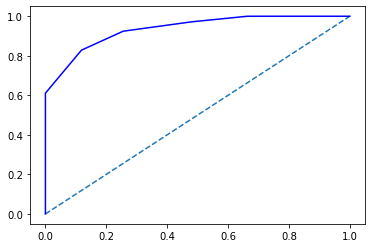

In [299]:
probs = knn.predict_proba(x_train_scaled)  # predict probabilities
probs = probs[:, 1]  # keep probabilities for the positive outcome only

knn_train_auc = roc_auc_score(y_train, probs)      # AUC
print('AUC for the Train (KNN): %.2f' %   knn_train_auc) 

knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train, probs) # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(knn_train_fpr, knn_train_tpr, color='Blue')   # plot the roc curve for the model

AUC for the Test (KNN): 0.84


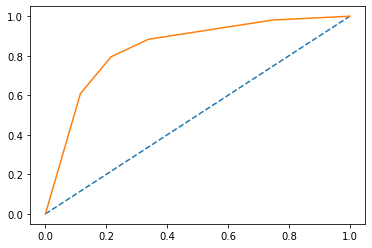

In [300]:
probs = knn.predict_proba(x_test_scaled)  # predict probabilities
probs = probs[:, 1]  # keep probabilities for the positive outcome only

knn_test_auc = roc_auc_score(y_test, probs)      # AUC
print('AUC for the Test (KNN): %.2f' %   knn_test_auc) 

knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test, probs) # calculate roc curve
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(knn_test_fpr, knn_test_tpr)   # plot the roc curve for the model

In [301]:
knn_score=[]

for k in range(1,10,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    scores=knn.score(x_test,y_test)
    knn_score.append(scores)
    
error=[1-x for x in knn_score]
error

[0.25877192982456143,
 0.23026315789473684,
 0.21271929824561409,
 0.19298245614035092,
 0.19736842105263153]

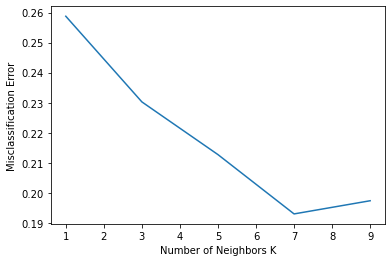

In [285]:
# plot error vs k
plt.plot(range(1,10,2), error)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [302]:
knn7 = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2 )

In [303]:
knn7.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [305]:
knn7.score(x_train_scaled, y_train)  # Train score k = 7

0.8586239396795476

In [306]:
knn7.score(x_test_scaled, y_test) # # Test score k = 7

0.8026315789473685

In [309]:
b = knn7.predict(x_train_scaled)

In [310]:
print(confusion_matrix(y_train,b))

[[230  91]
 [ 59 681]]


In [308]:
print(confusion_matrix(y_test, a))

[[ 90  49]
 [ 41 276]]


### 4. Naive Bayes

In [242]:
from sklearn.naive_bayes import GaussianNB

In [243]:
nb = GaussianNB()

In [244]:
nb.fit(x_train,y_train)

GaussianNB()

In [245]:
nb_train_pred = nb.predict(x_train)
nb_train_score = nb.score(x_train, y_train)
print('\033[1m', 'Naive Bayes Train Set','\033[0m')
print('\033[96m', nb_train_score)
print('\n')
print(confusion_matrix(y_train, nb_train_pred))
print('\n')
print(classification_report(y_train, nb_train_pred))

 Naive Bayes Train Set 
 0.8407163053722903


[[231  90]
 [ 79 661]]


              precision    recall  f1-score   support

           0       0.75      0.72      0.73       321
           1       0.88      0.89      0.89       740

    accuracy                           0.84      1061
   macro avg       0.81      0.81      0.81      1061
weighted avg       0.84      0.84      0.84      1061



AUC for the Train (Naive Bayes): 0.84


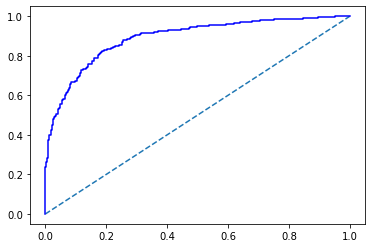

In [246]:
probs = nb.predict_proba(x_train)  
probs = probs[:, 1]

nb_train_auc = roc_auc_score(y_train, probs)
print('AUC for the Train (Naive Bayes): %.2f' %   knn_test_auc) 

nb_train_fpr, nb_train_tpr, nb_train_thresholds = roc_curve(y_train, probs) 
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(nb_train_fpr, nb_train_tpr, color='Blue')   

In [247]:
nb_test_pred = nb.predict(x_test)
nb_test_score = nb.score(x_test, y_test)

print('\033[1m', 'Naive Bayes Test Set', '\033[0m')
print('\033[91m', nb_test_score)
print('\n')
print(confusion_matrix(y_test, nb_test_pred))
print('\n')
print(classification_report(y_test, nb_test_pred))
print('\n')

 Naive Bayes Test Set 
 0.831140350877193


[[ 96  43]
 [ 34 283]]


              precision    recall  f1-score   support

           0       0.74      0.69      0.71       139
           1       0.87      0.89      0.88       317

    accuracy                           0.83       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456





AUC for the Test (Naive Bayes) : 0.878458


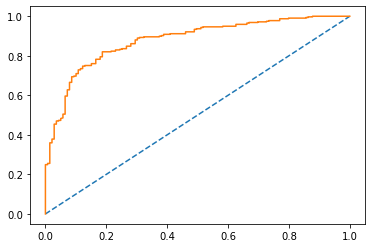

In [248]:
probs = nb.predict_proba(x_test)
probs = probs[:,1]

nb_test_auc = roc_auc_score(y_test, probs)
print('AUC for the Test (Naive Bayes) : %2f' % nb_test_auc)

nb_test_fpr, nb_test_tpr, nb_test_threesholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle = '--')

plt.plot(nb_test_fpr, nb_test_tpr)


### KNN and Naive Bayes Comparision

In [249]:
print('Accuracy on Train set KNN: %.2f' %  knn.score(x_train_scaled, y_train))
print('Accuracy on Test set KNN: %.2f' %  knn.score(x_test_scaled, y_test))

print('\n')

print('Accuracy on Train set Naive Bayes: %.2f' %  nb.score(x_train, y_train))
print('Accuracy on Test set Naive Bayes: %.2f' %  nb.score(x_test, y_test))

print('\n')

print('AUC Score on Train set - KNN :', np.round(knn_train_auc,2))
print('AUC Score on Test set - KNN : ', np.round(knn_test_auc,2))
print('\n')

print('AUC Score on Train set - Naive Bayes :',np.round(nb_train_auc,2))
print('AUC Score on Test set - Naive Bayes :', np.round(nb_test_auc,2))




Accuracy on Train set KNN: 0.87
Accuracy on Test set KNN: 0.82


Accuracy on Train set Naive Bayes: 0.84
Accuracy on Test set Naive Bayes: 0.83


AUC Score on Train set - KNN : 0.94
AUC Score on Test set - KNN :  0.84


AUC Score on Train set - Naive Bayes : 0.89
AUC Score on Test set - Naive Bayes : 0.88


### 5. Random Forest - Bagging


In [250]:
from sklearn.ensemble import RandomForestClassifier

In [251]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [252]:
rf_train_pred = rf.predict(x_train)
rf_train_score = rf.score(x_train, y_train)

print('\033[1m', 'Random Forest Train Set', '\033[0m')
print('\033[96m', rf_train_score)
print(confusion_matrix(y_train, rf_train_pred))
print(classification_report(y_train, rf_train_pred))

 Random Forest Train Set 
 1.0
[[321   0]
 [  0 740]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       321
           1       1.00      1.00      1.00       740

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [253]:
rf_test_pred = rf.predict(x_test)
rf_test_score = rf.score(x_test, y_test)
print(rf_test_score)
print(confusion_matrix(y_test, rf_test_pred))
print(classification_report(y_test, rf_test_pred))

0.8157894736842105
[[ 86  53]
 [ 31 286]]
              precision    recall  f1-score   support

           0       0.74      0.62      0.67       139
           1       0.84      0.90      0.87       317

    accuracy                           0.82       456
   macro avg       0.79      0.76      0.77       456
weighted avg       0.81      0.82      0.81       456



In [254]:
from sklearn.ensemble import BaggingClassifier

In [255]:
Bagging_RF = BaggingClassifier(n_estimators = 100 , base_estimator=rf, random_state = 2)

In [256]:
Bagging_RF.fit(x_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=2)

In [257]:
Bagging_RF.score(x_train, y_train)

0.9670122525918945

In [258]:
rfbag_train_pred = Bagging_RF.predict(x_train)
print(confusion_matrix(y_train, rfbag_train_pred))

[[295  26]
 [  9 731]]


In [259]:
print(classification_report(y_train, rfbag_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       321
           1       0.97      0.99      0.98       740

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



In [260]:
rfbag_test_pred = Bagging_RF.predict(x_test)
rfbag_test_score = Bagging_RF.score(x_test, y_test)
print(rfbag_test_score)
print(confusion_matrix(y_test, rfbag_test_pred))
print(classification_report(y_test, rfbag_test_pred))

0.8157894736842105
[[ 86  53]
 [ 31 286]]
              precision    recall  f1-score   support

           0       0.74      0.62      0.67       139
           1       0.84      0.90      0.87       317

    accuracy                           0.82       456
   macro avg       0.79      0.76      0.77       456
weighted avg       0.81      0.82      0.81       456



AUC for the Train  (Bagging) :  0.9978824619011535


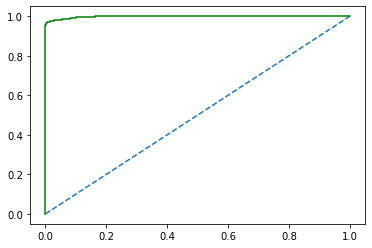

In [261]:
probs = Bagging_RF.predict_proba(x_train)
probs = probs[:,1]

bag_train_auc = roc_auc_score(y_train, probs)
print('AUC for the Train  (Bagging) : ',  bag_train_auc)

bag_train_fpr, bag_train_tpr, bag_train_threesholds = roc_curve(y_train, probs)
plt.plot([0,1], [0,1], linestyle = '--')

plt.plot(bag_train_fpr, bag_train_tpr, color= 'green')


AUC for the Test  (Bagging) :  0.8715589042961215


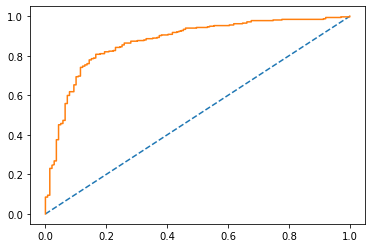

In [262]:
probs = Bagging_RF.predict_proba(x_test)
probs = probs[:,1]

bag_test_auc = roc_auc_score(y_test, probs)
print('AUC for the Test  (Bagging) : ',  bag_test_auc)

bag_test_fpr, bag_test_tpr, bag_test_threesholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle = '--')

plt.plot(bag_test_fpr, bag_test_tpr)


In [263]:
print('Accuracy on Train set Bagging Classifier : %.2f' %  Bagging_RF.score(x_train, y_train))
print('Accuracy on Test set Bagging Classifier : %.2f' %  Bagging_RF.score(x_test, y_test))

Accuracy on Train set Bagging Classifier : 0.97
Accuracy on Test set Bagging Classifier : 0.82


### 6. Random Forest - Boosting

In [264]:
from sklearn.ensemble import AdaBoostClassifier

In [265]:
adb_rf = AdaBoostClassifier(base_estimator = rf, n_estimators=100,random_state=1)

In [266]:
adb_rf.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                   random_state=1)

In [267]:
adb_rf.score(x_train, y_train)

1.0

In [268]:
adb_train_pred = adb_rf.predict(x_train)   # train predict

In [269]:
print(confusion_matrix(y_train, adb_train_pred))

[[321   0]
 [  0 740]]


In [270]:
print(classification_report(y_train, adb_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       321
           1       1.00      1.00      1.00       740

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [271]:
adb_test_pred = adb_rf.predict(x_test)   # test predict

In [272]:
adb_rf.score(x_test, y_test)

0.8114035087719298

In [273]:
print(confusion_matrix(y_test, adb_test_pred))

[[ 86  53]
 [ 33 284]]


In [274]:
print(classification_report(y_test, adb_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.62      0.67       139
           1       0.84      0.90      0.87       317

    accuracy                           0.81       456
   macro avg       0.78      0.76      0.77       456
weighted avg       0.81      0.81      0.81       456



AUC for the Train  (Boosting) :  1.0


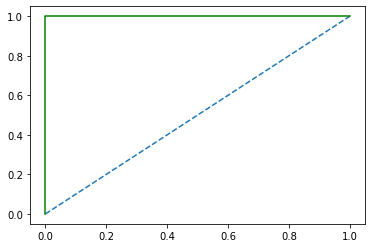

In [275]:
probs = adb_rf.predict_proba(x_train)
probs = probs[:,1]

adb_train_auc = roc_auc_score(y_train, probs)
print('AUC for the Train  (Boosting) : ',  adb_train_auc)

adb_train_fpr, adb_train_tpr, adb_train_threesholds = roc_curve(y_train, probs)
plt.plot([0,1], [0,1], linestyle = '--')

plt.plot(adb_train_fpr, adb_train_tpr, color='green')


AUC for the Test  (Boosting) :  0.8616299389510473


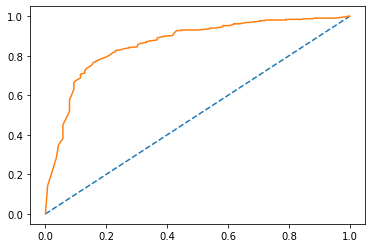

In [276]:
probs =adb_rf.predict_proba(x_test)
probs = probs[:,1]

adb_test_auc = roc_auc_score(y_test, probs)
print('AUC for the Test  (Boosting) : ',  adb_test_auc)

adb_test_fpr, adb_test_tpr, adb_test_threesholds = roc_curve(y_test, probs)
plt.plot([0,1], [0,1], linestyle = '--')

plt.plot(adb_test_fpr, adb_test_tpr)


In [277]:
print('Accuracy on Train set Boosting Classifier : %.2f' %  adb_rf.score(x_train, y_train))
print('Accuracy on Test set Boosting Classifier : %.2f' %  adb_rf.score(x_test, y_test))

Accuracy on Train set Boosting Classifier : 1.00
Accuracy on Test set Boosting Classifier : 0.81


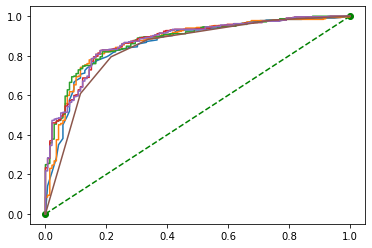

In [316]:
plt.plot([0,1], [0,1], 'go--')
plt.plot(adb_test_fpr,adb_test_tpr)
plt.plot(bag_test_fpr, bag_test_tpr)
plt.plot(nb_test_fpr, nb_test_tpr)
plt.plot(logr_test_fpr, logr_test_tpr)
plt.plot(lda_test_fpr, lda_test_tpr)
plt.plot(knn_test_fpr, knn_test_tpr)
